In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",100)
%matplotlib inline

In [3]:
df = pd.read_csv("Customer Data.csv")

## Data Understanding

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

- there's a null values, which will be handled later.

In [173]:
df.columns

Index(['balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure'],
      dtype='object')

In [198]:
# Convert Columns to lowercase
lower = [x.lower() for x in df.columns]
df.columns = lower
# Remove unnecessary column
df = df.drop("cust_id")

In [202]:
# Visualize data structure
df.head()

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# Dataset Dimensions
print(f"Dataset has {df.shape[0]} rows, and {df.shape[1]} columns.")

Dataset has 8950 rows, and 18 columns.


In [203]:
# Create a copy to not ruin the training data
df_copy = df.copy()

In [5]:
# drop useless columns
df = df.drop("cust_id",axis=1)

KeyError: "['cust_id'] not found in axis"

- Drop NaNs


df = df.dropna()

### Descriptive Statistics

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


### Insights

- The average balance is 1560
- The average balance frequency is high which means that we have a high purchase customers
- the average purchases is 1000$ and there's a lot of diversity in it
- the one time purchases average more than the installment average
- more than 75% of the customers don't have advance cash
- the credit limit average is near 4500 $
- more than 75% of tenure is 12
- minimum payments is 850 $


In [205]:
# Round The number to be more human friendly
for column in df.columns:
    df[column] = df[column].round(2)

### Analyzing Balance

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BALANCE', ylabel='Density'>

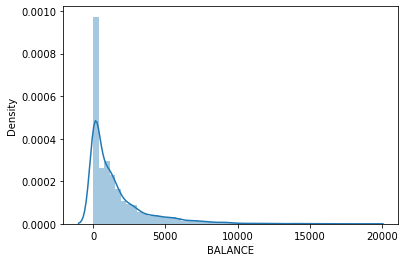

In [15]:
# Distribution
sns.distplot(df["BALANCE"])

- the customers balances are between 0 and 3000

#### Customers with more than 5000 balance have near to 1 balance frequency

### Balance Frequency

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BALANCE_FREQUENCY', ylabel='Density'>

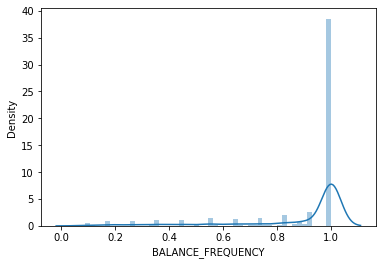

In [35]:
sns.distplot(df["BALANCE_FREQUENCY"])
plt.title("Distribution of balance frequency")

### What is the behaviours of customers with lower than 1 balance frequency

In [48]:
df[df["BALANCE_FREQUENCY"] < 0.5].sample(20)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8745,1000.81,0.29,0.00,0.00,0.00,3465.27,0.00,0.00,0.00,0.14,6,0,6000.0,235.35,460.70,0.00,7
6570,8.85,0.45,220.99,0.00,220.99,0.00,0.92,0.00,0.83,0.00,0,11,1000.0,286.31,52.84,0.12,12
3861,58.17,0.18,438.87,438.87,0.00,0.00,0.08,0.08,0.00,0.00,0,1,7500.0,1748.47,270.53,0.00,12
1215,2.55,0.18,322.98,322.98,0.00,0.00,0.17,0.17,0.00,0.00,0,3,9500.0,1210.43,5.46,0.00,12
7128,15.23,0.27,384.00,0.00,384.00,0.00,1.00,0.00,1.00,0.00,0,12,1500.0,568.98,54.45,0.27,12
3137,21.97,0.45,335.00,0.00,335.00,0.00,0.42,0.00,0.42,0.00,0,5,1000.0,742.77,145.14,0.33,12
3225,175.93,0.33,264.98,0.00,264.98,1556.63,0.22,0.00,0.11,0.33,3,6,1500.0,5379.82,153.46,1.00,9
3563,21.79,0.33,0.00,0.00,0.00,273.88,0.00,0.00,0.00,0.17,1,0,1200.0,574.48,30.62,1.00,6
5412,286.69,0.09,0.00,0.00,0.00,3742.71,0.00,0.00,0.00,0.08,2,0,4000.0,0.00,NaN,0.00,12
8178,41.39,0.36,194.57,194.57,0.00,0.00,0.17,0.17,0.00,0.00,0,2,2200.0,470.43,170.00,0.00,12


- Customer with lower balance frequency tend to have more purchases

#### Relationship between balance and balance frequency:

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance', ylabel='balance_frequency'>

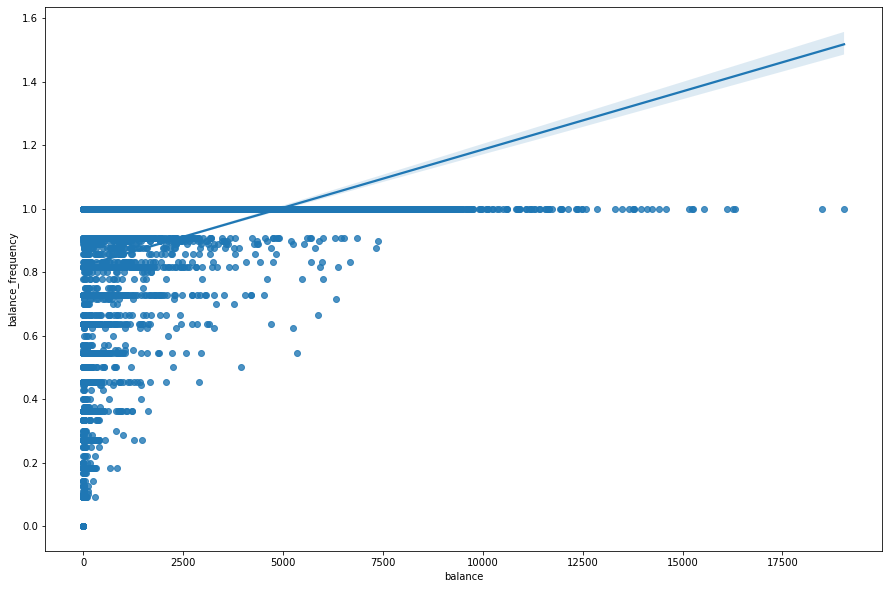

In [13]:
# Creating a Regrission plot
plt.figure(figsize=(15,10))
sns.regplot(df["balance"],df["balance_frequency"])
plt.title("Regression plot balance vs balance frequency")

In [18]:
# Spearman correlation

from scipy.stats import spearmanr,pearsonr

spearmanr(df["balance"],df["balance_frequency"])


SpearmanrResult(correlation=0.544980971507205, pvalue=0.0)

- There's a strong correlation between balance frequency and balance.

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

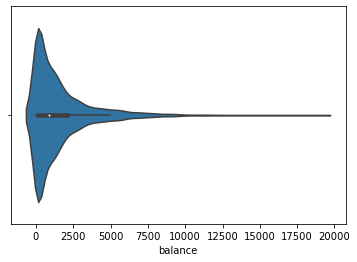

In [29]:
sns.violinplot(df["balance"])
plt.title("Balance Distribution")

#### Analyzing Purchases

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='purchases', ylabel='Density'>

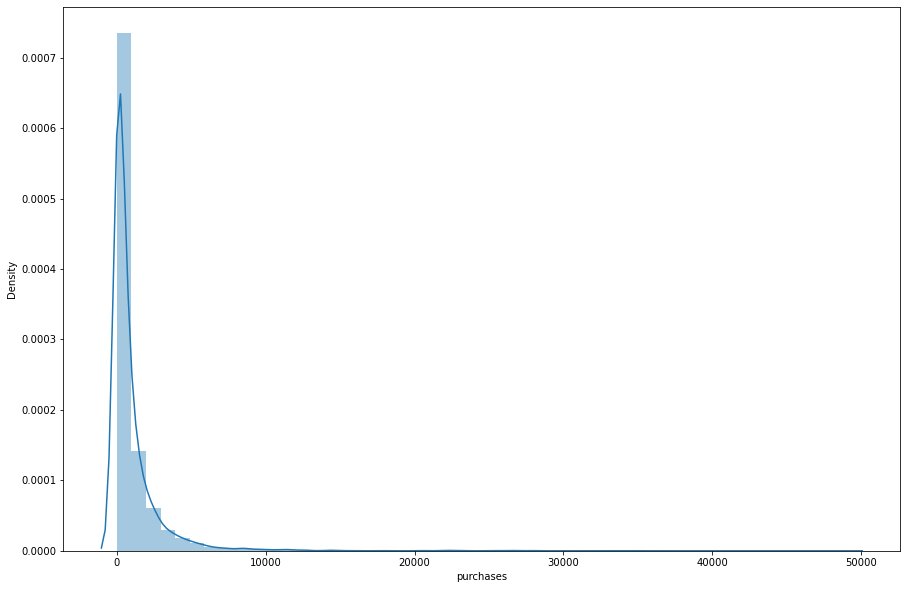

In [33]:
plt.figure(figsize=(15,10))
sns.distplot(df["purchases"])
plt.title("Purchases Distribution")

- Most purchase is less than 10000 $ 

In [35]:
## Balance of customers who has more than 10000 $ Purchases.
df[df["purchases"] > 10000]["balance"]

125      2392.917738
138     19043.138560
171       975.942008
204      4559.779234
220      9047.621884
229      2723.369217
273      5131.319584
393     11209.370760
501     13479.288210
507      2643.343414
511      2549.128288
550     11547.520010
560      1311.732049
563      1202.975648
574      3452.538704
584      2690.771926
587      2492.726282
591      8781.831676
624      3123.339488
645      1482.235539
652      7760.525400
669     10359.454710
854      4419.302940
941      2072.457624
970      3108.393701
1190     1893.611922
1256     4010.621974
1412      972.665818
1433     1367.479599
1447     8151.985277
1560     2774.249582
1582     1229.397644
1585     8809.504736
1604     3391.702180
1641     3454.094319
1709     1917.441126
1754      912.360030
1765     1377.812538
1991     1513.075264
2261      847.191896
2523      984.724235
2823    11642.601560
2970     5968.583246
3093     6773.941979
3123     9753.114706
3181    11631.323370
3282     3122.507074
3652     8700

- Customers with high purchases tend to have more than 1000 in their balance

### Hypothesis testing 

In [42]:
# is there a difference in purchasing behaviour between more than 1000 $ customer balance and lower.

more_1000 = df[df["balance"] > 1000]["purchases"]
less_1000 = df[df["balance"] < 1000]["purchases"]

# Comparing Averages.

print(more_1000.mean(),less_1000.mean())

In [60]:
from scipy.stats import ttest_ind

Resualts = ttest_ind(more_1000,less_1000)

print(f"p_value : {Resualts[1]:.03f}")


p_value : 0.000


- since the pvalue is less than 0.05, we  reject the null hypothesis which means that the purchase behaviour is not same for under and more than 1000 $ balance

### oneoff vs installment purchases

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


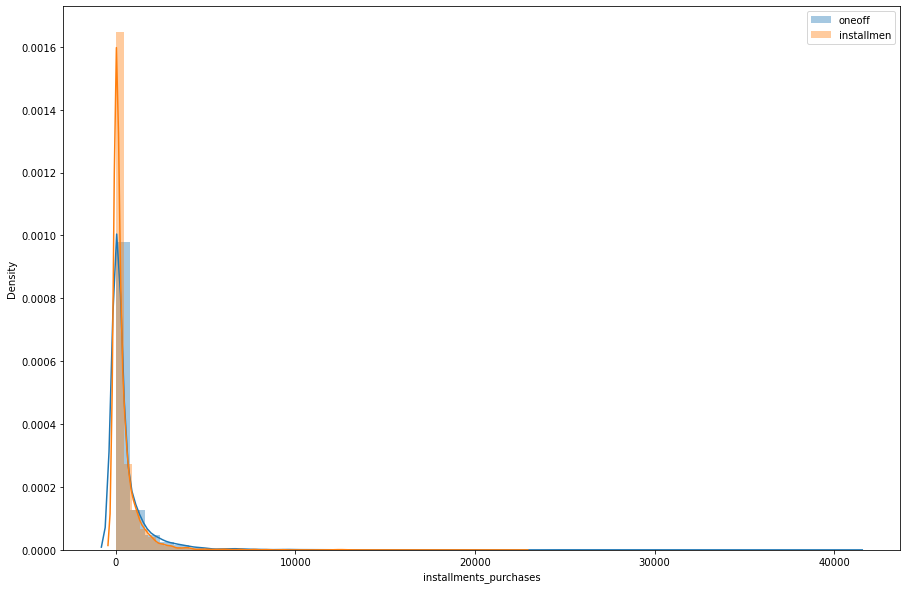

In [69]:
plt.figure(figsize=(15,10))
sns.distplot(df["oneoff_purchases"],label="oneoff")
sns.distplot(df["installments_purchases"],label="installment")
plt.title("Distribution of installment and oneoff purchases")
plt.legend()

#### The installments purchases are more than oneoff purchases 

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


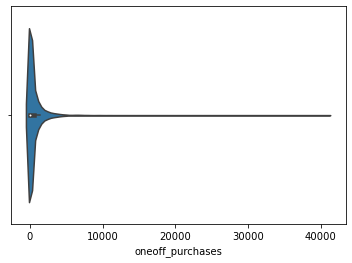

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='installments_purchases'>

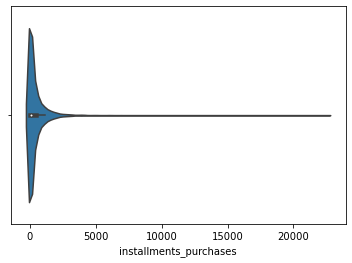

In [71]:
sns.violinplot(df["oneoff_purchases"])
plt.show()
sns.violinplot(df["installments_purchases"])

In [72]:
# Correlation between installment and oneoff purchases
spearmanr(df["installments_purchases"],df["oneoff_purchases"])

SpearmanrResult(correlation=0.20048438605159924, pvalue=8.159390058304421e-82)

<AxesSubplot:xlabel='oneoff_purchases', ylabel='installments_purchases'>

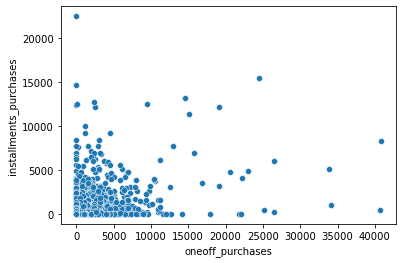

In [73]:
# Scatterplot oneoff vs installments purchases
sns.scatterplot(data=df,x="oneoff_purchases",y="installments_purchases")

- There's weak relationship between oneoff purchase, and onstallments purchases

In [75]:
df[["purchases","installments_purchases","oneoff_purchases"]].sample(20)

,purchases,installments_purchases,oneoff_purchases
5534,701.59,0.00,701.59
5610,0.00,0.00,0.00
7657,679.24,579.24,100.00
582,0.00,0.00,0.00
8947,144.40,144.40,0.00
3840,0.00,0.00,0.00
4331,175.40,175.40,0.00
7154,2371.92,2371.92,0.00
1408,454.20,454.20,0.00
3648,0.00,0.00,0.00


In [83]:
# Customers with zero purchases
zero_purchase = df[df["purchases"] == 0]
zero_purchase["balance"].mean()

2151.202935006848

- Customers with zero purchases have higher average balance 

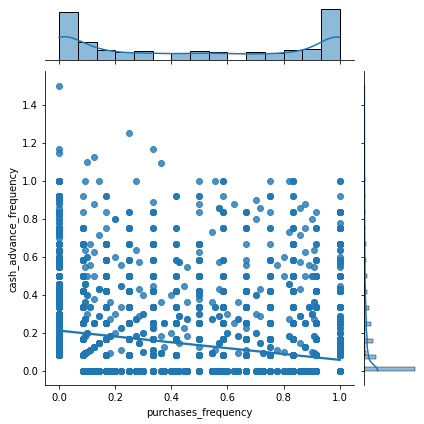

In [81]:
sns.jointplot(data=df, x="purchases_frequency",y="cash_advance_frequency",kind="reg")

- there's no pattern shows that there's a relation between purchases and cash advance frequency

In [82]:
df.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Relationship between Credit limit and balance.

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='credit_limit', ylabel='balance'>

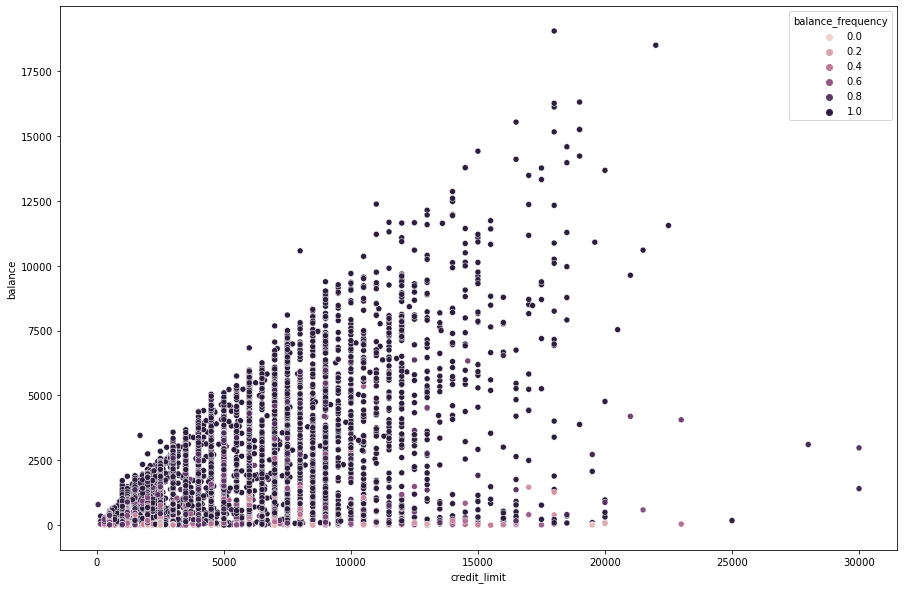

In [90]:
## Relationship between Credit limit and balance.
plt.figure(figsize=(15,10))
sns.scatterplot(df["credit_limit"],df["balance"],hue=df["balance_frequency"])
plt.title("credit limit vs balance scatterplot")

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


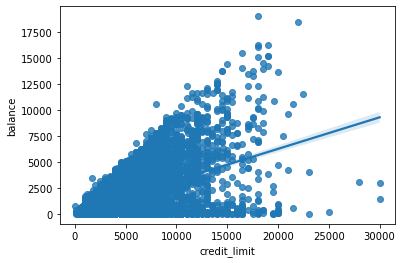

SpearmanrResult(correlation=nan, pvalue=nan)

In [93]:
# Regression plot and correlation coef.
sns.regplot(df["credit_limit"],df["balance"])
plt.show()
spearmanr(df["credit_limit"],df["balance"])

In [101]:
pearsonr(df["credit_limit"],df["balance"])

(0.5355181791739637, 0.0)

- there's strong positive correlation between credit limit and balance.

### Which tenure has the greatest balance?

<AxesSubplot:xlabel='tenure'>

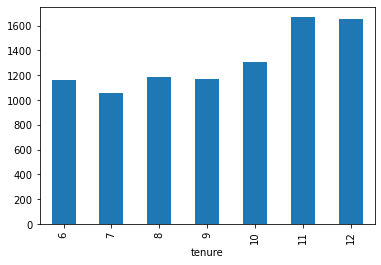

In [105]:
df.groupby("tenure")["balance"].mean().plot(kind="bar")

In [107]:
pearsonr(df["tenure"],df["balance"])

(0.06698709706421063, 4.6283198527187457e-10)

there's no rcorrelation between tenure and balance

### Distribution of payments

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='payments', ylabel='Density'>

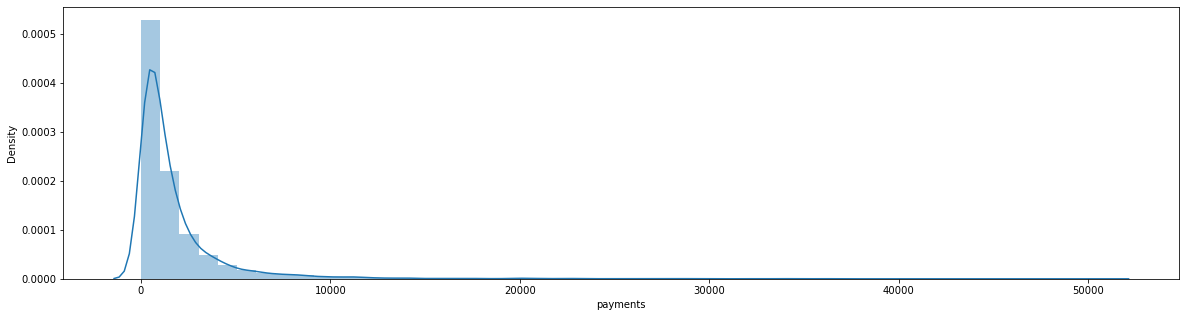

In [110]:
plt.figure(figsize=(20,5))
sns.distplot(df["payments"])

plt.title("Payments Distribution")

In [111]:
(df["payments"] > 10000).sum()

169

In [113]:
# investigate customers who has more than 10000 payments

df[df["payments"] > 10000]["balance"]

39      1411.60
71      2990.42
109     6644.20
125     2392.92
133     9354.06
         ...   
7426      36.98
7553    2017.39
7645    7081.17
7688    4486.64
8237    2144.04
Name: balance, Length: 169, dtype: float64

- people with higher payments has higher balance

##### Distribution of higher than 10000 $ payments balances

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='balance', ylabel='Density'>

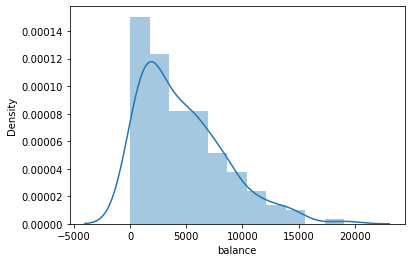

In [114]:
sns.distplot(df[df["payments"] > 10000]["balance"])

- people with high payments have high balances

## Findings

- people with high payments have high balances
- the tenure 12 customer has more balances
- there's a positive relationship between credit_limit and balance
- the more the credit limit the more balance frequency
- there's no relation between cash advance and purchases
- most purchases less than 10000 $
- the installments purchases are more than oneoff purchases
- the balance amount affects the purchases


# Clustering Model Building

## Feature Engineering

## Checking for outliers

- I will use z-score to detect and remove outliers

In [119]:
from scipy.stats import zscore

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


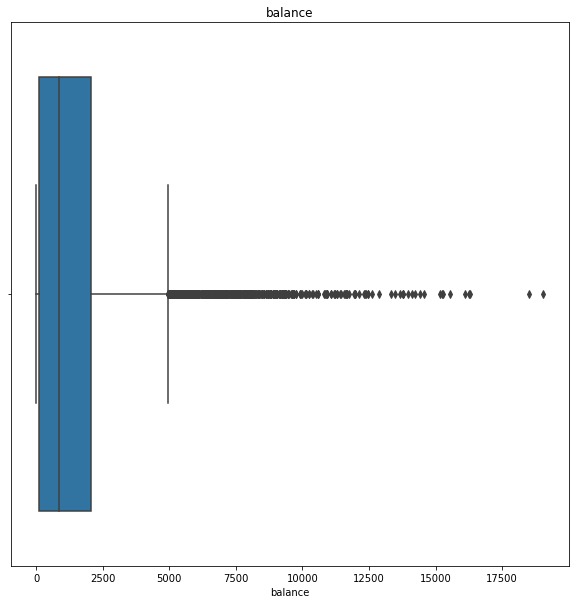

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


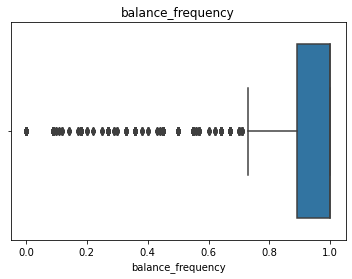

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


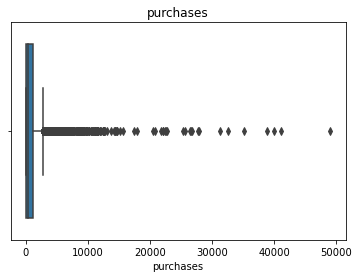

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


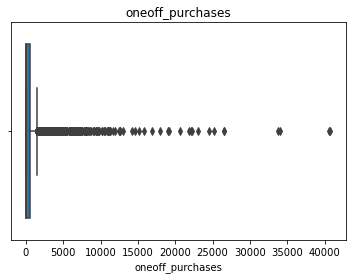

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


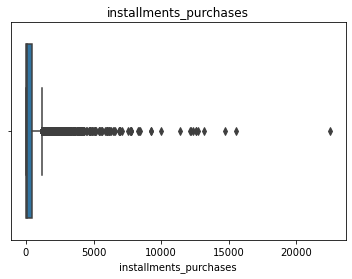

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


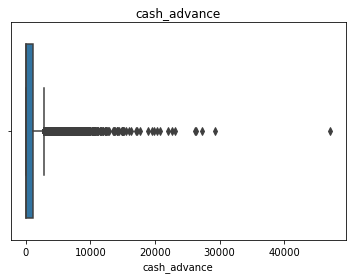

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


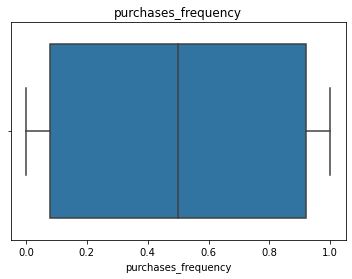

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


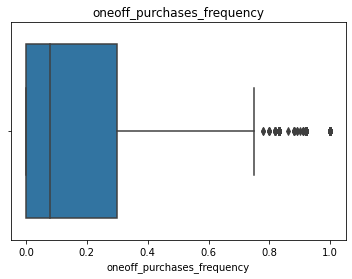

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


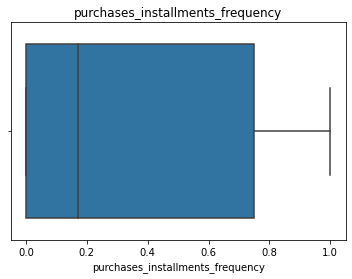

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


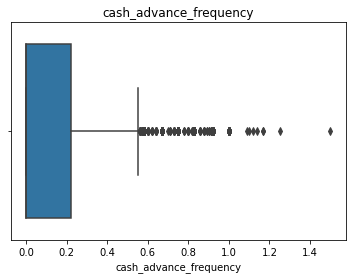

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


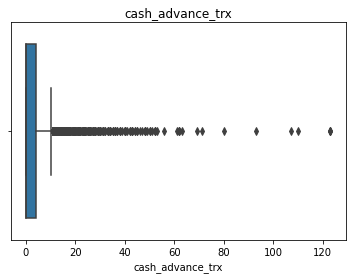

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


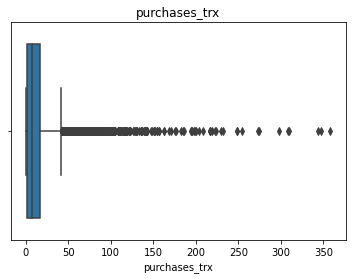

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


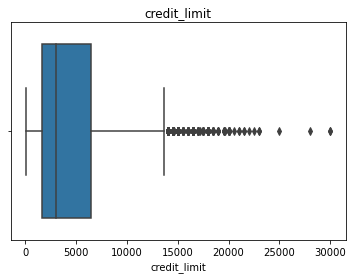

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


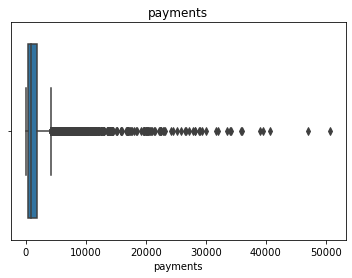

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


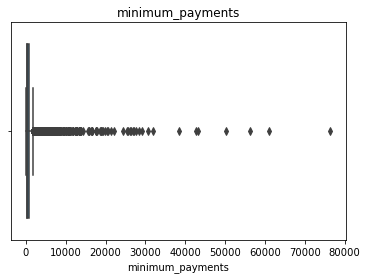

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


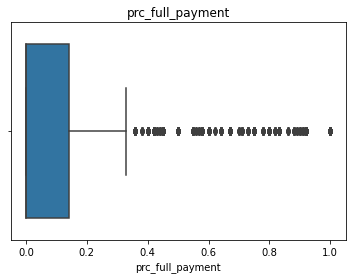

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


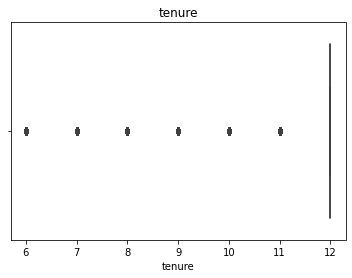

In [49]:
# Plotting box plots to get better intiuition where the outliers are.
plt.figure(figsize=(10,10))
for feature in df.columns:
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.show()

### Data Has a lots of outliers which may means that we have sampling bias 

### Outliers Removal

I will use z-score algorithm to remove outliers.

In [7]:
for feature in df.columns:
    df['z_score'] = (df[feature] - df[feature].mean()) / df[feature].std()
    new_df = df[(df['z_score'] < 3) & (df['z_score'] > -3)]

In [8]:
new_df = new_df.drop("z_score",axis=1)

In [9]:
new_df.shape

(8275, 17)

### Scaling
I will rescale the data using whiten function from scipy

In [ ]:
# I will use whiten function from scipy for scaling
from scipy.cluster.vq import whiten

new_df[["balance","purchases","oneoff_purchases","installments_purchases","cash_advance","cash_advance_trx","purchases_trx","credit_limit","payments","minimum_payments"]] = whiten(new_df[["balance","purchases","oneoff_purchases","installments_purchases","cash_advance","cash_advance_trx","purchases_trx","credit_limit","payments","minimum_payments"]])

### Clustering Model Building

##### Choosing the right number of clusters.

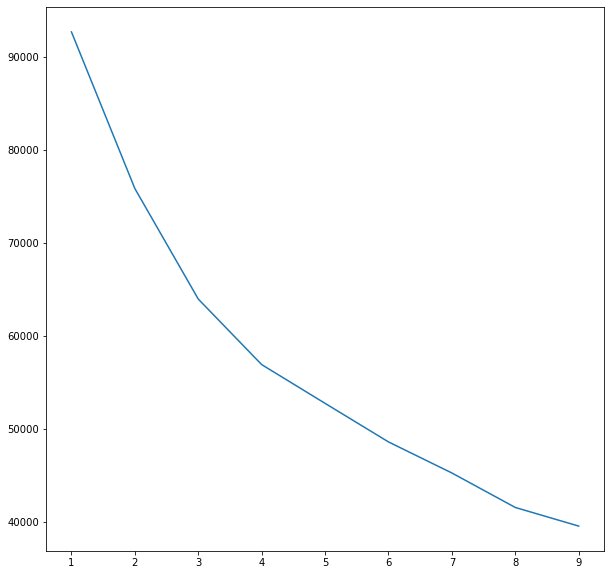

In [48]:
# Using elbow technique.
from sklearn.cluster import KMeans
w = []
plt.figure(figsize=(10,10))
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit(new_df)
    w.append(km.inertia_)
plt.plot(range(1,10),w)    

- I'll use 2 clusters since the data is biased

### Hierarchical Clustering

In [14]:
from scipy.cluster.hierarchy import linkage,fcluster

distance = linkage(new_df,metric = 'euclidean',method = "complete")
clusters = fcluster(distance, 2, criterion='maxclust')


In [17]:
# Assign clusters to the data.
new_df["clusters"] = clusters


In [23]:
new_df.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,clusters
0,0.019518,0.82,0.044024,0.00000,0.104013,0.000000,0.17,0.00,0.08,0.00,0.000000,0.079431,0.273297,0.069356,0.058805,0.00,12,3
1,1.528297,0.91,0.000000,0.00000,0.000000,3.037214,0.00,0.00,0.00,0.25,0.578695,0.000000,1.913076,1.410150,0.452001,0.22,12,3
2,1.190747,1.00,0.356796,0.45907,0.000000,0.000000,1.00,1.00,0.00,0.00,0.000000,0.476587,2.049724,0.213796,0.264404,0.00,12,3
4,0.390231,1.00,0.007384,0.00950,0.000000,0.000000,0.08,0.08,0.00,0.00,0.000000,0.039716,0.327956,0.233132,0.103181,0.00,12,3
5,0.863695,1.00,0.615270,0.00000,1.453654,0.000000,0.67,0.00,0.58,0.00,0.000000,0.317725,0.491934,0.481180,1.014677,0.00,12,3


In [19]:
new_df["clusters"].value_counts()

2    8252
1      23
Name: clusters, dtype: int64

- the value_counts confirms my observation that the data is biased

In [22]:
cluster_1 = new_df[new_df["clusters"] == 1]
cluster_2 = new_df[new_df["clusters"] == 2]



### Visualizing Clusters

### Balance vs Purchases

<AxesSubplot:xlabel='balance', ylabel='purchases'>

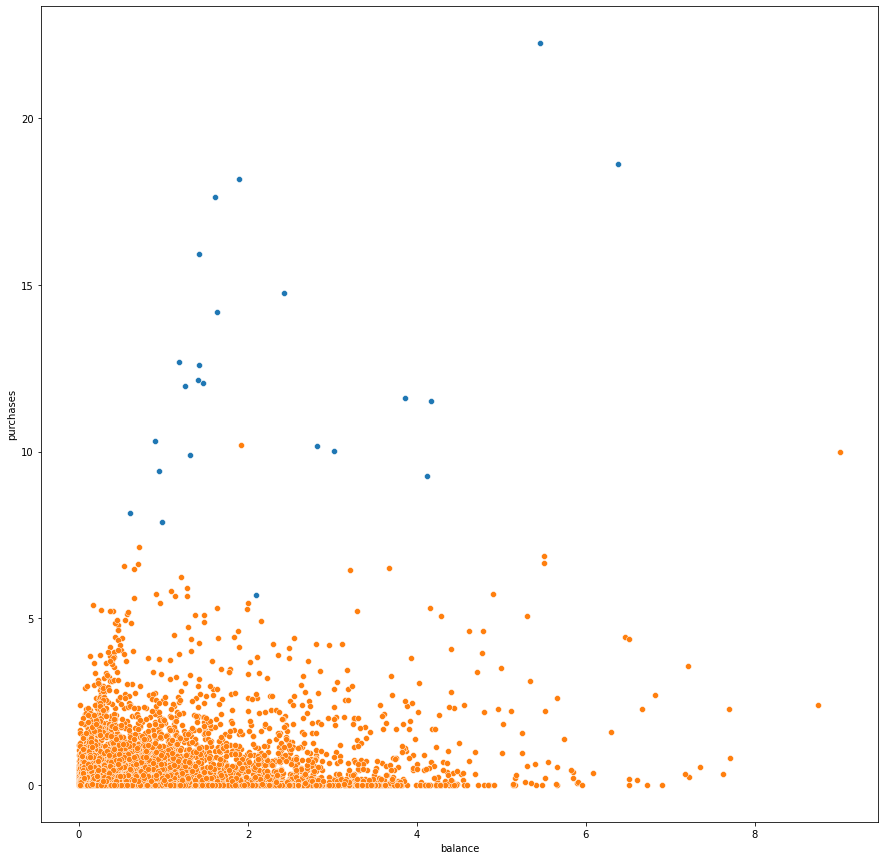

In [24]:
plt.figure(figsize=(15,15))

sns.scatterplot(data=cluster_1,x="balance",y="purchases")
sns.scatterplot(data=cluster_2,x="balance",y="purchases")




- Cluster 2 customers have high purchases and low to mid balnce

### Balance vs Payments

<AxesSubplot:xlabel='balance', ylabel='payments'>

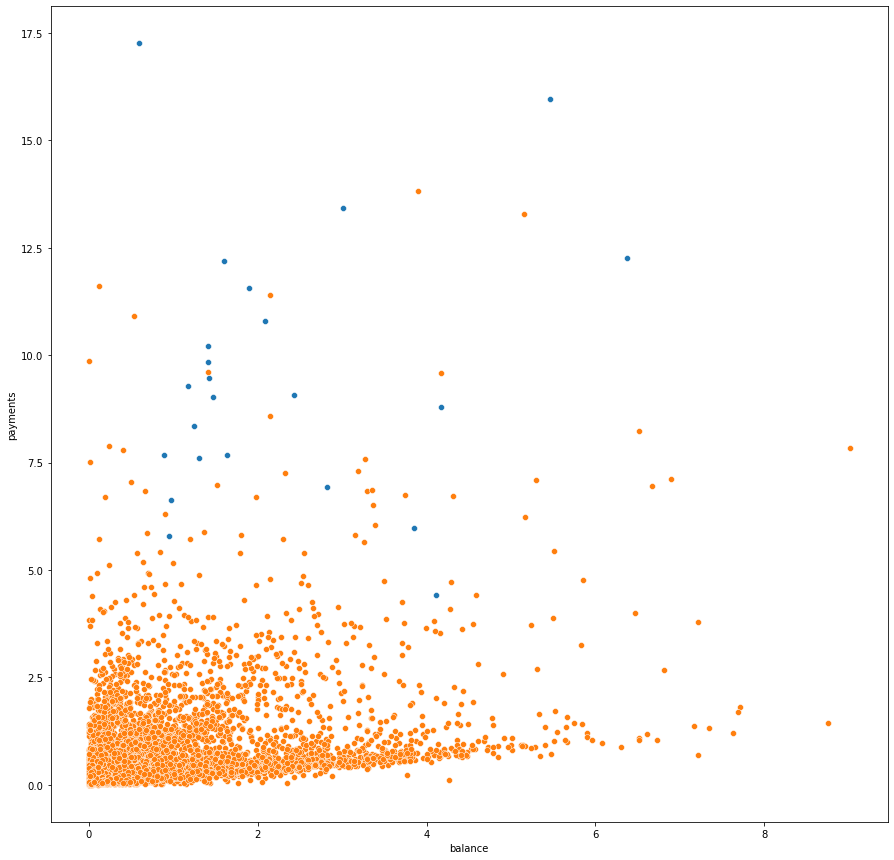

In [25]:
plt.figure(figsize=(15,15))

sns.scatterplot(data=cluster_1,x="balance",y="payments")
sns.scatterplot(data=cluster_2,x="balance",y="payments")

### Purchases vs payments

<AxesSubplot:xlabel='purchases', ylabel='payments'>

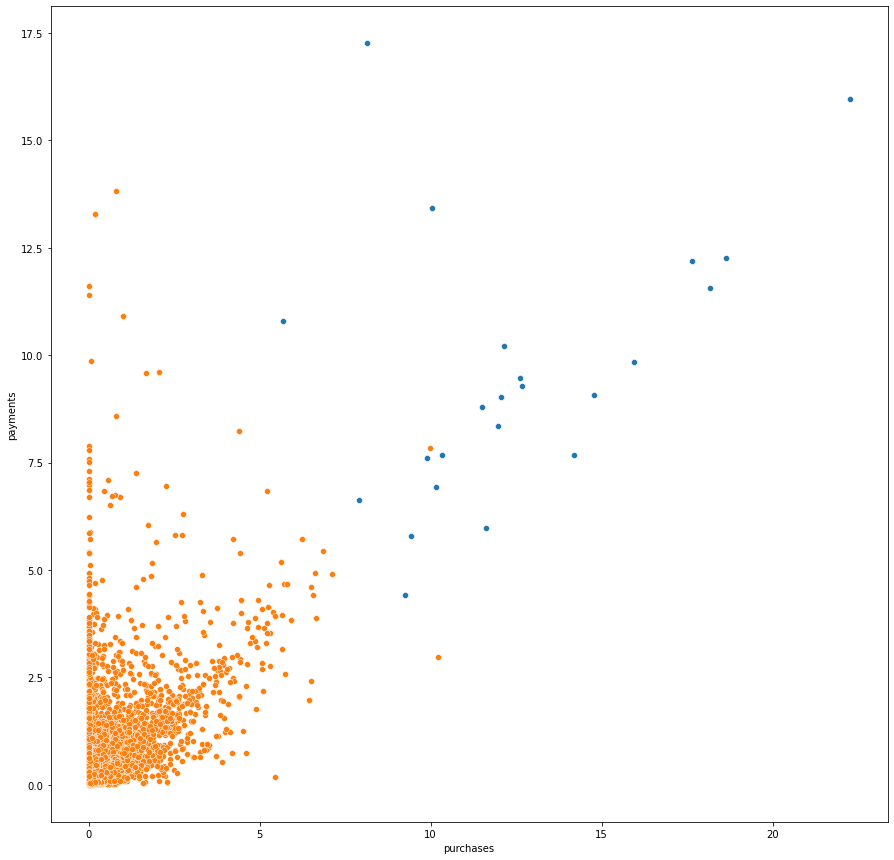

In [26]:
plt.figure(figsize=(15,15))

sns.scatterplot(data=cluster_1,x="purchases",y="payments")
sns.scatterplot(data=cluster_2,x="purchases",y="payments")

- The cluster 2 which is the low percentage of the customers tend to have high purchases, high balances, and high payments.

### Clustering Evaluation
using silhouette_score

In [27]:
from sklearn.metrics import silhouette_score

score = silhouette_score(new_df.drop("clusters",axis=1),clusters)

In [30]:
print(f"Your Clustering model score is %{np.round(score*100,2)}")

Your Clustering model score is %83.67


##### Good result with biased data.

I won't deploy the model because the data is bad and it will not work as expected.

## The End

### Thank You